In [98]:
import geopandas as gpd
import pylab as pl
import seaborn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
buffer = gpd.read_file("./l_subway_entrances.shp")
buffer.head(1)

,cartodb_id,geometry,line,name,objectid,url
0,1,POLYGON ((-73.98107453687093 40.73625527260773...,L-N-Q-R-4-5-6,Broadway & 16th St at SE corner,1866,http://web.mta.info/nyct/service/


In [126]:
def MNorBK(xx):
    bk_buffer = buffer[buffer.geometry.centroid.map(lambda x: x.x) > xx]
    mn_buffer = buffer[buffer.geometry.centroid.map(lambda x: x.x) < xx]
    bk = bk_buffer.geometry.unary_union
    mn = mn_buffer.geometry.unary_union
    return mn, bk

L_nyc = buffer.geometry.unary_union
L_mn, L_bk = MNorBK(-73.97)

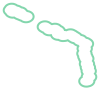

In [94]:
L_nyc.boundary

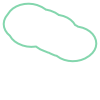

In [95]:
L_mn.boundary

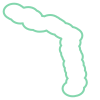

In [96]:
L_bk.boundary

In [162]:
buffer_output = gpd.GeoDataFrame({"nyc": L_nyc, "bk": L_bk, "mn": L_mn}).ix[[0]].T
buffer_output.rename(columns={0: 'geometry'}, inplace=True)
buffer_output.to_pickle("./buffer_output.p")